In [91]:
from shapely.geometry import Point
from geopandas import GeoSeries, GeoDataFrame

import descartes
import numpy as np
import matplotlib.pyplot as plt
import pandas

%matplotlib inline

In [92]:
df = pandas.read_csv('../vehicules-circulation-2016.csv')

In [93]:
df.head(1)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE
0,2016,2016_0000000001,PAU,AU,MAZDA,3,2009.0,1221.0,4.0,2000.0,NaN,GRI,P,F,32.0,Laurentides (15),Deux-Montagnes (72 ),72010.0


In [163]:
shp = GeoDataFrame.from_file('/Users/alexandrebrilhante/GitHub/hack/region_admin_SHP/region_admin_poly.shp')

In [164]:
for index, row in shp.iterrows():
    shp.loc[index,'RES_NM_REG'] = str(row['RES_NM_REG']) + " (" + str(row['RES_CO_REG']) + ")"

In [211]:
df2 = df.groupby(['REG_ADM']).size()
df3 = pandas.DataFrame({"Reg":df2.index, "count":df2.values})

In [244]:
geo = shp[['RES_NM_REG', 'geometry']]
geo['count'] = None
print(df3)
for index,row in geo.iterrows():
    #geo.loc[index,'count'] = 
    print(row['RES_NM_REG'])
    print(df3.loc[ df3['Reg'] == row['RES_NM_REG'] ,'count'])

                                   Reg    count
0           Abitibi-Témiscamingue (08)   176371
1               Bas-Saint-Laurent (01)   209087
2              Capitale-Nationale (03)   584803
3                Centre-du-Québec (17)   241638
4            Chaudière-Appalaches (12)   428486
5                       Côte-Nord (09)    98541
6                          Estrie (05)   277517
7   Gaspésie–Îles-de-la-Madeleine (11)   101875
8                      Lanaudière (14)   433176
9                     Laurentides (15)   511469
10                          Laval (13)   288800
11                       Mauricie (04)   241631
12                       Montréal (06)   952528
13                     Montérégie (16)  1228211
14                 Nord-du-Québec (10)    26159
15                      Outaouais (07)   301546
16        Saguenay–Lac-Saint-Jean (02)   289083
Côte-Nord (09)
5    98541
Name: count, dtype: int64
Côte-Nord (09)
5    98541
Name: count, dtype: int64
Côte-Nord (09)
5    98541
Name: 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


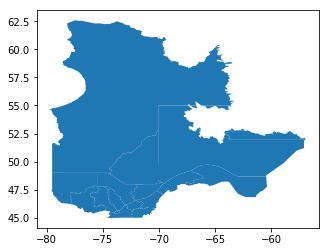

In [160]:
geo.plot(column='')
#    value = geo.loc[index,'RES_NM_REG']
 #   geo.loc[index,'count'] = df3.loc[ df3['Reg'] == value ,'count']